In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [72]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
REAL_LABEL, FAKE_LABEL = 1, 0
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [73]:
def custom_loss(predictions: torch.Tensor, target: int):
    '''
        An extension of the Binary Cross Entropy

        The first term in the product (log) is basically just the BCE
        
        The second term (pow) creates the balance between difficult and easy samples:

            Easy image -> Small distance between prediction and target
                       -> pow near 0 -> less contribution to the total loss
    
            Difficult image -> huge distance between prediction and target
                            -> pow near 1 -> more contribution to the total loss
        
    '''
    if target == 1:
        loss = -torch.log(predictions) * torch.pow(1 - predictions, 2)
    elif target == 0:
        loss = -torch.log(1 - predictions) * torch.pow(predictions, 2)
    else:
        assert False
    return torch.mean(loss)

In [74]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterion = custom_loss

G_losses, D_losses = [], []

In [75]:
def train(num_epochs = 1):
    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            netD.zero_grad()
            data_real = data[0].to(device)
            output_real = netD(data_real).view(-1)
            errD_real = criterion(output_real, 1)
            errD_real.backward()
            D_x = output_real.mean().item()

            noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
            data_fake = netG(noise)
            output_fake = netD(data_fake.detach()).view(-1)
            errD_fake = criterion(output_fake, 0)
            errD_fake.backward()
            D_G_z1 = output_fake.mean().item()

            errD = errD_real + errD_fake
            optimizerD.step()

            # ===============TRAIN_GENERATOR===============
            netG.zero_grad()
            output = netD(data_fake).view(-1)
            errG = criterion(output, 1)

            errG.backward()
            D_G_z2 = output.mean().item()
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f / %.4f'
                      % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

            G_losses.append(errG.item())
            D_losses.append(errD.item())


## TRAINING PROCESS

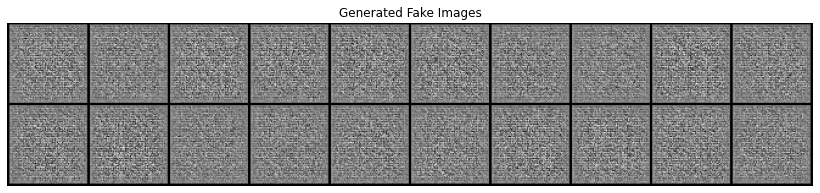

In [6]:
generate_images(netG)

In [76]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.8720   Loss_G: 6.6272   D(x): 0.5571   D(G(z)): 0.6300 / 0.0019
[100/468]   Loss_D: 0.0923   Loss_G: 3.0883   D(x): 0.8757   D(G(z)): 0.2680 / 0.0456
[200/468]   Loss_D: 0.1003   Loss_G: 1.2089   D(x): 0.6971   D(G(z)): 0.1029 / 0.1992
[300/468]   Loss_D: 0.0913   Loss_G: 0.6218   D(x): 0.6900   D(G(z)): 0.2300 / 0.3163
[400/468]   Loss_D: 0.0467   Loss_G: 0.9026   D(x): 0.7123   D(G(z)): 0.1405 / 0.2400
   EPOCH:  1
[000/468]   Loss_D: 0.0425   Loss_G: 1.1321   D(x): 0.7888   D(G(z)): 0.2376 / 0.2007
[100/468]   Loss_D: 0.0429   Loss_G: 0.7161   D(x): 0.7408   D(G(z)): 0.1803 / 0.2880
[200/468]   Loss_D: 0.0279   Loss_G: 1.2393   D(x): 0.7981   D(G(z)): 0.1950 / 0.1786
[300/468]   Loss_D: 0.0221   Loss_G: 1.1376   D(x): 0.7914   D(G(z)): 0.1488 / 0.1927
[400/468]   Loss_D: 0.0497   Loss_G: 1.1515   D(x): 0.8143   D(G(z)): 0.2831 / 0.1954
   EPOCH:  2
[000/468]   Loss_D: 0.0690   Loss_G: 0.8949   D(x): 0.6700   D(G(z)): 0.1542 / 0.2432
[100/468]   Los

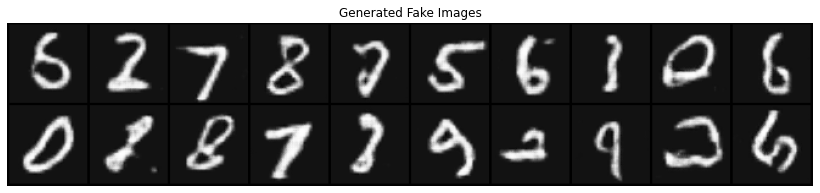

In [77]:
generate_images(netG)

In [78]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.7928   Loss_G: 0.2972   D(x): 0.2860   D(G(z)): 0.1241 / 0.4971
[100/468]   Loss_D: 0.0695   Loss_G: 1.5739   D(x): 0.8191   D(G(z)): 0.3297 / 0.1365
[200/468]   Loss_D: 0.0244   Loss_G: 1.3806   D(x): 0.7919   D(G(z)): 0.1638 / 0.1666
[300/468]   Loss_D: 0.0158   Loss_G: 1.7810   D(x): 0.8068   D(G(z)): 0.1041 / 0.1182
[400/468]   Loss_D: 0.0063   Loss_G: 2.4643   D(x): 0.8607   D(G(z)): 0.0529 / 0.0703
   EPOCH:  1
[000/468]   Loss_D: 0.0066   Loss_G: 1.4719   D(x): 0.8791   D(G(z)): 0.1000 / 0.1502
[100/468]   Loss_D: 0.2085   Loss_G: 0.4379   D(x): 0.6101   D(G(z)): 0.4215 / 0.3687
[200/468]   Loss_D: 0.1500   Loss_G: 0.4229   D(x): 0.6136   D(G(z)): 0.3031 / 0.3807
[300/468]   Loss_D: 0.2781   Loss_G: 0.2985   D(x): 0.5182   D(G(z)): 0.3635 / 0.4425
[400/468]   Loss_D: 0.2370   Loss_G: 0.4556   D(x): 0.6062   D(G(z)): 0.4508 / 0.3579
   EPOCH:  2
[000/468]   Loss_D: 0.1422   Loss_G: 0.6201   D(x): 0.6561   D(G(z)): 0.3466 / 0.3098
[100/468]   Los

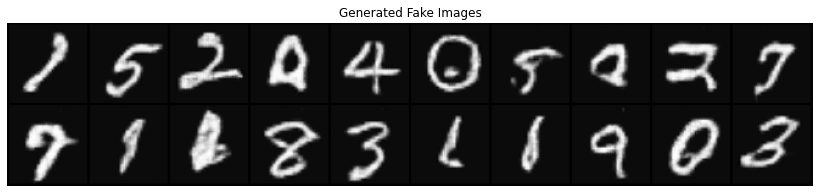

In [79]:
generate_images(netG)

In [80]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.3055   Loss_G: 0.3002   D(x): 0.7777   D(G(z)): 0.4649 / 0.4767
[100/468]   Loss_D: 0.2182   Loss_G: 0.5757   D(x): 0.6457   D(G(z)): 0.4345 / 0.3255
[200/468]   Loss_D: 0.0031   Loss_G: 2.3877   D(x): 0.8977   D(G(z)): 0.0829 / 0.0740
[300/468]   Loss_D: 0.0067   Loss_G: 1.8301   D(x): 0.9149   D(G(z)): 0.1377 / 0.1133
[400/468]   Loss_D: 0.0045   Loss_G: 2.1443   D(x): 0.8836   D(G(z)): 0.0861 / 0.0872
   EPOCH:  1
[000/468]   Loss_D: 0.0036   Loss_G: 2.3285   D(x): 0.8970   D(G(z)): 0.0830 / 0.0762
[100/468]   Loss_D: 0.0031   Loss_G: 2.3566   D(x): 0.9190   D(G(z)): 0.0943 / 0.0764
[200/468]   Loss_D: 0.0012   Loss_G: 2.4339   D(x): 0.9304   D(G(z)): 0.0689 / 0.0672
[300/468]   Loss_D: 0.2190   Loss_G: 0.3953   D(x): 0.6181   D(G(z)): 0.4353 / 0.3872
[400/468]   Loss_D: 0.1039   Loss_G: 0.7620   D(x): 0.6700   D(G(z)): 0.2781 / 0.2766
   EPOCH:  2
[000/468]   Loss_D: 0.0606   Loss_G: 1.0347   D(x): 0.7472   D(G(z)): 0.2643 / 0.2151
[100/468]   Los

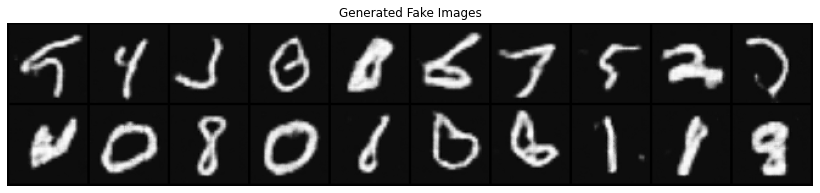

In [81]:
generate_images(netG)

In [82]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.6279   Loss_G: 0.3445   D(x): 0.3226   D(G(z)): 0.1175 / 0.4504
[100/468]   Loss_D: 0.1205   Loss_G: 0.8130   D(x): 0.8701   D(G(z)): 0.3733 / 0.2725
[200/468]   Loss_D: 0.2367   Loss_G: 0.4409   D(x): 0.6068   D(G(z)): 0.4516 / 0.3667
[300/468]   Loss_D: 0.0594   Loss_G: 0.8767   D(x): 0.7377   D(G(z)): 0.2547 / 0.2465
[400/468]   Loss_D: 0.0085   Loss_G: 1.9197   D(x): 0.8478   D(G(z)): 0.1062 / 0.1057
   EPOCH:  1
[000/468]   Loss_D: 0.3967   Loss_G: 0.3043   D(x): 0.4270   D(G(z)): 0.3055 / 0.4601
[100/468]   Loss_D: 0.1819   Loss_G: 0.6412   D(x): 0.6962   D(G(z)): 0.4334 / 0.3007
[200/468]   Loss_D: 0.1087   Loss_G: 0.6667   D(x): 0.7193   D(G(z)): 0.3592 / 0.2953
[300/468]   Loss_D: 0.0125   Loss_G: 1.6324   D(x): 0.8190   D(G(z)): 0.1110 / 0.1316
[400/468]   Loss_D: 0.0805   Loss_G: 0.5388   D(x): 0.6623   D(G(z)): 0.1973 / 0.3408
   EPOCH:  2
[000/468]   Loss_D: 0.0073   Loss_G: 2.1464   D(x): 0.8476   D(G(z)): 0.0867 / 0.0871
[100/468]   Los

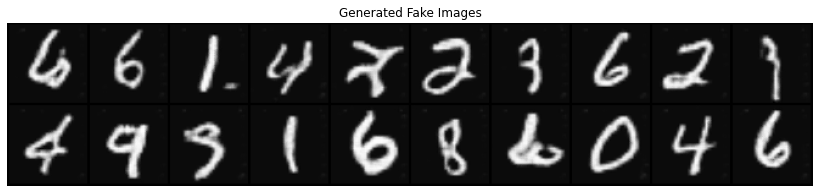

In [83]:
generate_images(netG)

In [84]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0341   Loss_G: 1.8620   D(x): 0.8843   D(G(z)): 0.2442 / 0.1110
[100/468]   Loss_D: 0.0039   Loss_G: 1.9059   D(x): 0.9154   D(G(z)): 0.1200 / 0.1046
[200/468]   Loss_D: 2.1026   Loss_G: 16.2184   D(x): 0.9968   D(G(z)): 0.8995 / 0.0000
[300/468]   Loss_D: 0.1518   Loss_G: 0.7956   D(x): 0.6989   D(G(z)): 0.3895 / 0.2603
[400/468]   Loss_D: 0.2884   Loss_G: 0.6101   D(x): 0.5093   D(G(z)): 0.3246 / 0.3243
   EPOCH:  1
[000/468]   Loss_D: 0.1224   Loss_G: 2.3688   D(x): 0.8943   D(G(z)): 0.4151 / 0.0705
[100/468]   Loss_D: 0.0368   Loss_G: 0.9375   D(x): 0.7460   D(G(z)): 0.1841 / 0.2295
[200/468]   Loss_D: 0.0088   Loss_G: 1.8569   D(x): 0.8482   D(G(z)): 0.1084 / 0.1092
[300/468]   Loss_D: 0.0073   Loss_G: 1.7076   D(x): 0.8704   D(G(z)): 0.1267 / 0.1223
[400/468]   Loss_D: 0.0042   Loss_G: 1.8818   D(x): 0.8787   D(G(z)): 0.0900 / 0.1074
   EPOCH:  2
[000/468]   Loss_D: 0.2289   Loss_G: 0.4475   D(x): 0.7697   D(G(z)): 0.4752 / 0.3857
[100/468]   Lo

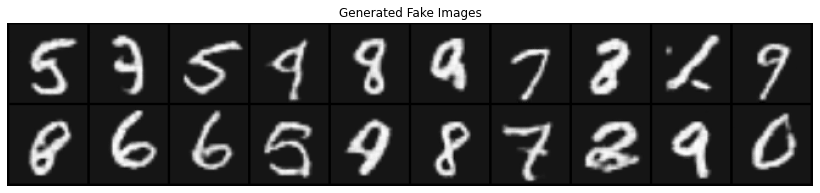

In [85]:
generate_images(netG)

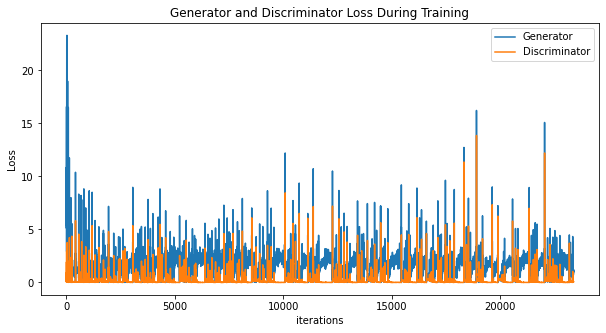

In [86]:
plot_losses(G_losses, D_losses)